In [2]:
import glob
import os
import pandas as pd
import json
import re
import tqdm
from matplotlib import pyplot as plt

In [3]:
sc_files = glob.glob("../output/*/*.sc")

In [4]:
len(sc_files)

12879

In [6]:
sc_dicts = []
for sc_file in tqdm.tqdm_notebook(sc_files):
    with open(sc_file,'r') as f:
        
        temp_dict = json.loads(f.readline().replace("nan","Infinity"))
        deltas = []
        keys = list(temp_dict.keys())

        befores = []
        afters = []

        for key in keys:
            if re.search("before_.*_score",key):
                after_key = "after" + key[6:]
                before = temp_dict.pop(key)
                after = temp_dict.pop(after_key)
                befores.append(before)
                afters.append(after)
                deltas.append(after - before)

            if re.search(".*_measure",key):
                temp_dict.pop(key)

        temp_dict["min_delta"] = min(deltas)
        temp_dict["max_delta"] = max(deltas)
        temp_dict["avg_delta"] = sum(deltas)/len(deltas)
        temp_dict["cst_before"] = sum(befores)
        temp_dict["min_before"] = min(befores)
        temp_dict["max_before"] = max(befores)
        temp_dict["avg_before"] = temp_dict["cst_before"] / len(befores)
        temp_dict["cst_after"] = sum(afters)
        temp_dict["min_after"] = min(afters)
        temp_dict["max_after"] = max(afters)
        temp_dict["avg_after"] = temp_dict["cst_after"] / len(afters)
        sc_dicts.append(temp_dict)
        


/home/rdkibler/.conda/envs/pyro/lib/python3.7/site-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [7]:
len(sc_dicts)

12879

In [8]:
df = pd.DataFrame(sc_dicts)

In [9]:
#adds paths to df

dx = []
pdbs = glob.glob("../output/*/*.pdb")
for pdb in pdbs:
    abs_pdb = os.path.abspath(pdb)
    decoy = ".".join(pdb.split("/")[-1].split(".")[:-1])
    dx.append({"decoy":decoy,"path":abs_pdb})
path_df = pd.DataFrame(dx)
df = df.merge(path_df,on="decoy")
#df.merge(pd.DataFrame(dx),on="decoy")



In [10]:
df.to_csv("master.csv")

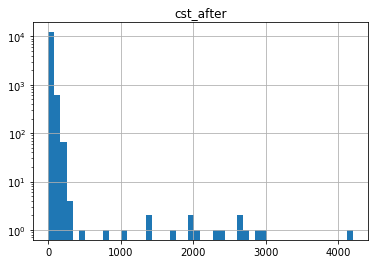

In [11]:
df.hist("cst_after",bins=50)
plt.yscale('log')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fffc55215c0>]],
      dtype=object)

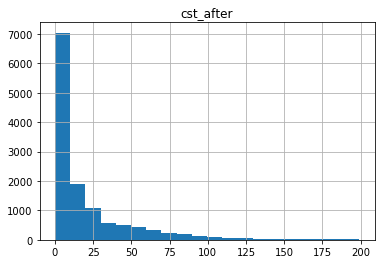

In [12]:
df[df.cst_after < 200].hist("cst_after",bins=20)

In [13]:
df = df[df.cst_after < 1.0]

In [14]:
df.columns

Index(['decoy', 'AveDeg_AB_interface_ILV', 'AveDeg_A_ILV', 'AveDeg_B_ILV',
       'AveDeg_ILV', 'AveDeg_aro_apolar', 'NetCharge_chainA',
       'NetCharge_chainB', 'RotamerBoltzmannWeight_hbnet_neighborhood',
       'RotamerBoltzmannWeight_hbnet_only',
       ...
       'avg_delta', 'cst_before', 'min_before', 'max_before', 'avg_before',
       'cst_after', 'min_after', 'max_after', 'avg_after', 'path'],
      dtype='object', length=101)

In [15]:
df.worst9mer.max()

0.7093595266342163

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fffc548c668>]],
      dtype=object)

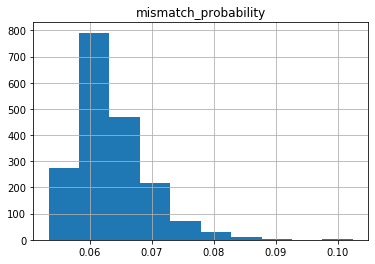

In [16]:
df.hist("mismatch_probability")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fffc53499e8>]],
      dtype=object)

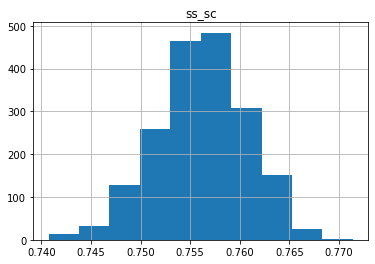

In [17]:
df.hist("ss_sc")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fffc52bd710>]],
      dtype=object)

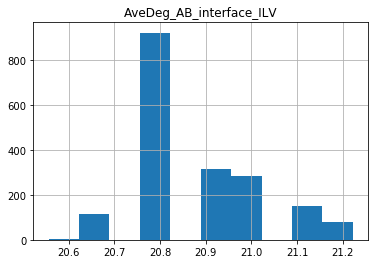

In [18]:
df.hist("AveDeg_AB_interface_ILV")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fffc529ff60>]],
      dtype=object)

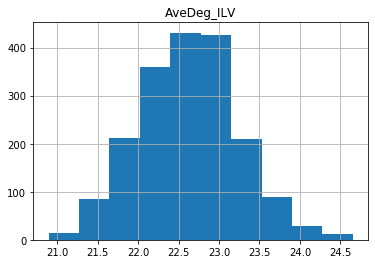

In [19]:
df.hist("AveDeg_ILV")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fffc522af28>]],
      dtype=object)

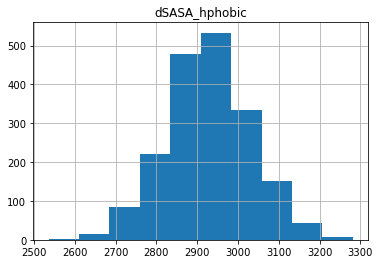

In [20]:
df.hist("dSASA_hphobic")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fffc5205a58>]],
      dtype=object)

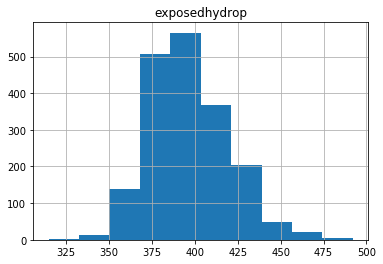

In [21]:
df.hist("exposedhydrop")

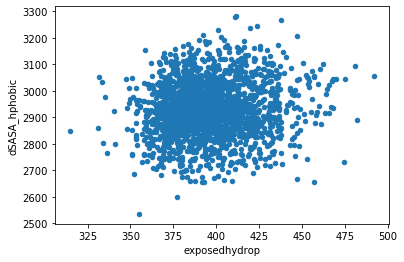

In [22]:
df.plot.scatter(y="dSASA_hphobic",x="exposedhydrop")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fffc76d0128>]],
      dtype=object)

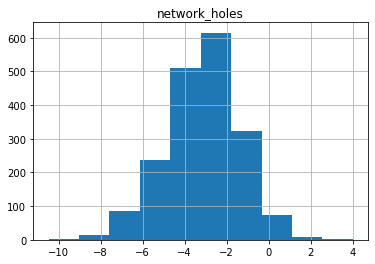

In [23]:
df.hist("network_holes")

In [24]:
#c/o I used in rotation proejct
df = df[df.network_holes < -1.4] 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fffc55b8d68>]],
      dtype=object)

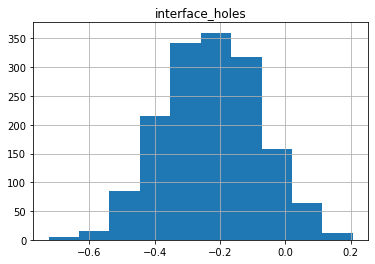

In [25]:
df.hist("interface_holes")

In [26]:
#also feel like this should be capped at 0
df = df[df.interface_holes < 0]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fffc514abe0>]],
      dtype=object)

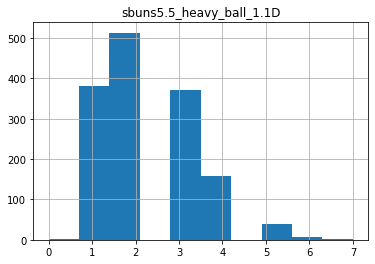

In [27]:
df.hist("sbuns5.5_heavy_ball_1.1D")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fffc52f97b8>]],
      dtype=object)

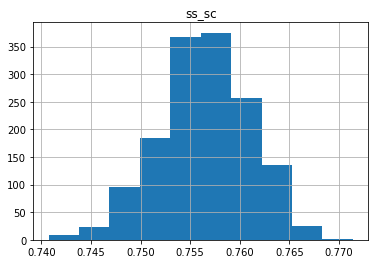

In [28]:
df.hist("ss_sc")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fffc5092908>]],
      dtype=object)

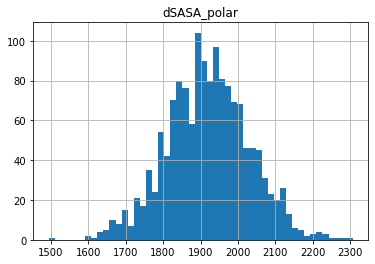

In [29]:
df.hist("dSASA_polar",bins=50)

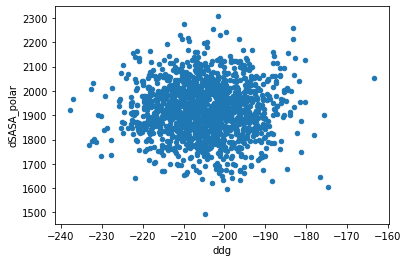

In [30]:
df.plot.scatter(y="dSASA_polar",x="ddg")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fffc4eb8278>]],
      dtype=object)

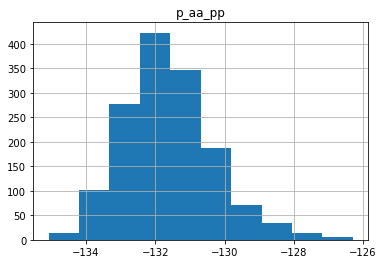

In [31]:
df.hist("p_aa_pp")

In [32]:
#let's cut this at -130 to get rid of that tail
df = df[df["p_aa_pp"] < -130]

In [33]:
len(df)

1317

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fffc4e342e8>]],
      dtype=object)

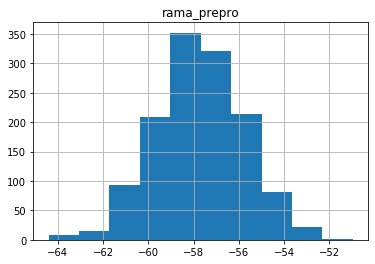

In [34]:
df.hist("rama_prepro")

0.05332542210817337


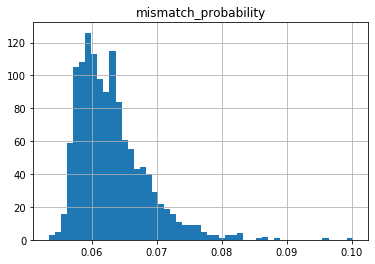

In [35]:
df.hist("mismatch_probability",bins=50)
print(min(df["mismatch_probability"]))

In [36]:
df = df[df["mismatch_probability"] < 0.07]

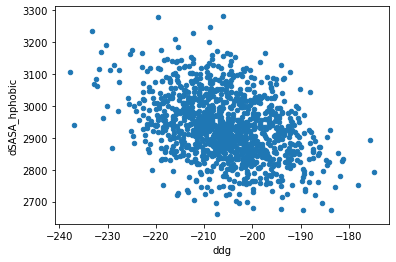

In [37]:
df.plot.scatter(y="dSASA_hphobic",x="ddg")

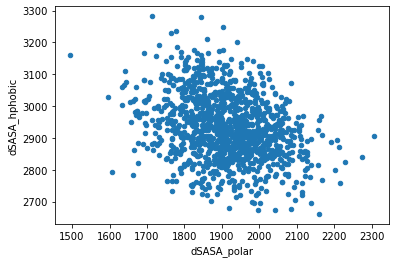

In [38]:
df.plot.scatter(y="dSASA_hphobic",x="dSASA_polar")

In [39]:
df = df[df["dSASA_polar"] > 1900]

In [40]:
df

,decoy,AveDeg_AB_interface_ILV,AveDeg_A_ILV,AveDeg_B_ILV,AveDeg_ILV,AveDeg_aro_apolar,NetCharge_chainA,NetCharge_chainB,RotamerBoltzmannWeight_hbnet_neighborhood,RotamerBoltzmannWeight_hbnet_only,...,avg_delta,cst_before,min_before,max_before,avg_before,cst_after,min_after,max_after,avg_after,path
22,churro_9x25GB28GB_2_works_dimer_nm_00987_hb_00...,20.777779,24.666666,27.000000,22.142857,25.214815,-7.0,-6.0,-0.502671,-0.335609,...,0.042513,0.025680,0.0,0.009813,0.002853,0.408294,0.0,0.338857,0.045366,/mnt/home/rdkibler/projects/tiara_gen2/toroids...
66,churro_9x25GB28GB_2_works_dimer_nm_00536_hb_00...,21.000000,24.722221,26.944445,23.028572,25.337036,-3.0,-12.0,-0.519677,-0.431751,...,0.048972,0.026408,0.0,0.014588,0.002401,0.565096,0.0,0.427467,0.051372,/mnt/home/rdkibler/projects/tiara_gen2/toroids...
77,churro_9x25GB28GB_2_works_dimer_nm_00131_hb_00...,20.888889,24.500000,27.222221,23.605263,25.354244,-11.0,-5.0,-0.565393,-0.445073,...,0.040250,0.003043,0.0,0.002447,0.000380,0.325044,0.0,0.320710,0.040631,/mnt/home/rdkibler/projects/tiara_gen2/toroids...
93,churro_9x25GB28GB_2_works_dimer_nm_00422_hb_00...,20.777779,24.722221,27.000000,23.150000,25.374075,-1.0,-12.0,-0.521580,-0.353436,...,0.003821,0.001495,0.0,0.001446,0.000136,0.043527,0.0,0.028754,0.003957,/mnt/home/rdkibler/projects/tiara_gen2/toroids...
97,churro_9x25GB28GB_2_works_dimer_nm_00705_hb_00...,20.888889,24.833334,27.055555,22.571428,25.333334,-5.0,-8.0,-0.647913,-0.464263,...,0.186398,0.072872,0.0,0.072872,0.018218,0.818465,0.0,0.818465,0.204616,/mnt/home/rdkibler/projects/tiara_gen2/toroids...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12794,churro_9x25GB28GB_2_works_dimer_nm_00569_hb_00...,21.111111,24.722221,27.055555,23.081081,25.217712,-10.0,-3.0,-0.578099,-0.398404,...,0.137619,0.018882,0.0,0.018882,0.003776,0.706979,0.0,0.706979,0.141396,/mnt/home/rdkibler/projects/tiara_gen2/toroids...
12809,churro_9x25GB28GB_2_works_dimer_nm_00587_hb_00...,20.888889,24.555555,27.277779,22.911112,25.072992,-13.0,-5.0,-0.617323,-0.568189,...,0.032004,0.001975,0.0,0.001411,0.000219,0.290008,0.0,0.290008,0.032223,/mnt/home/rdkibler/projects/tiara_gen2/toroids...
12836,churro_9x25GB28GB_2_works_dimer_nm_00125_hb_00...,21.000000,24.722221,27.111111,22.340910,25.203703,-7.0,-10.0,-0.750952,-0.701046,...,0.030443,0.036424,0.0,0.025726,0.003035,0.401741,0.0,0.303724,0.033478,/mnt/home/rdkibler/projects/tiara_gen2/toroids...
12840,churro_9x25GB28GB_2_works_dimer_nm_00058_hb_00...,20.777779,24.666666,26.944445,22.351351,25.210333,-4.0,-9.0,-0.421665,-0.436739,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,/mnt/home/rdkibler/projects/tiara_gen2/toroids...


In [41]:
df.columns

Index(['decoy', 'AveDeg_AB_interface_ILV', 'AveDeg_A_ILV', 'AveDeg_B_ILV',
       'AveDeg_ILV', 'AveDeg_aro_apolar', 'NetCharge_chainA',
       'NetCharge_chainB', 'RotamerBoltzmannWeight_hbnet_neighborhood',
       'RotamerBoltzmannWeight_hbnet_only',
       ...
       'avg_delta', 'cst_before', 'min_before', 'max_before', 'avg_before',
       'cst_after', 'min_after', 'max_after', 'avg_after', 'path'],
      dtype='object', length=101)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fffc4d17898>]],
      dtype=object)

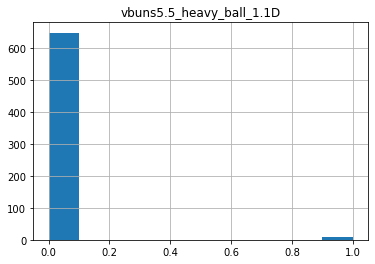

In [42]:
df.hist("vbuns5.5_heavy_ball_1.1D")

In [43]:
df = df[df["vbuns5.5_heavy_ball_1.1D"] == 0]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fffc4bd9c88>]],
      dtype=object)

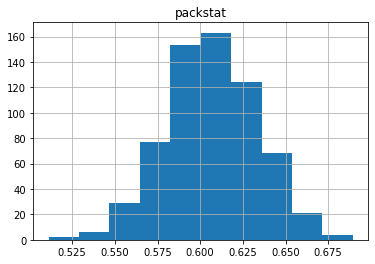

In [44]:
df.hist("packstat")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fffc4be40f0>]],
      dtype=object)

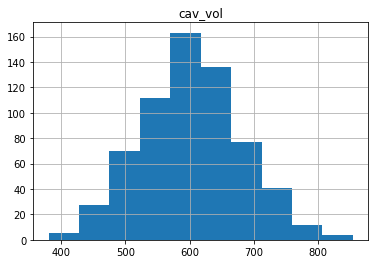

In [45]:
df.hist("cav_vol")

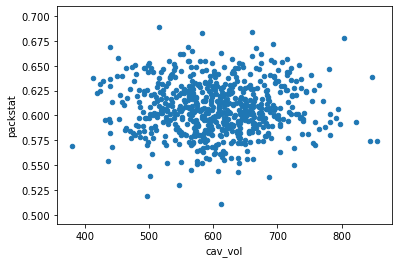

In [46]:
df.plot.scatter(y="packstat",x="cav_vol")

-0.5194863187958136


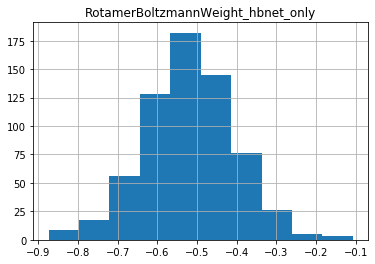

In [47]:
df.hist("RotamerBoltzmannWeight_hbnet_only")
print(sum(df["RotamerBoltzmannWeight_hbnet_only"])/len(df))

In [48]:
df = df[df["RotamerBoltzmannWeight_hbnet_only"] < -0.52]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fffc4a5a320>]],
      dtype=object)

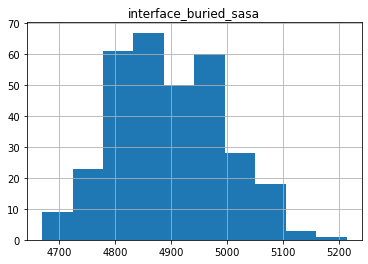

In [49]:
df.hist("interface_buried_sasa")

In [50]:
df.columns

Index(['decoy', 'AveDeg_AB_interface_ILV', 'AveDeg_A_ILV', 'AveDeg_B_ILV',
       'AveDeg_ILV', 'AveDeg_aro_apolar', 'NetCharge_chainA',
       'NetCharge_chainB', 'RotamerBoltzmannWeight_hbnet_neighborhood',
       'RotamerBoltzmannWeight_hbnet_only',
       ...
       'avg_delta', 'cst_before', 'min_before', 'max_before', 'avg_before',
       'cst_after', 'min_after', 'max_after', 'avg_after', 'path'],
      dtype='object', length=101)

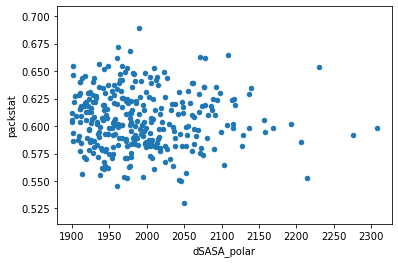

In [51]:
df.plot.scatter(x="dSASA_polar",y="packstat")

In [52]:

df = df.sort_values(by="dSASA_polar",ascending=False)[:100]

In [53]:
df.to_csv("filtered100.csv")

In [54]:
print("pymol ", end="")
for p in df.path:
    print(p,end=" ")


pymol /mnt/home/rdkibler/projects/tiara_gen2/toroids/02_4_churro-9x_xtreme/04_filter_v2/output/2/churro_9x25GB28GB_2_works_dimer_nm_00894_hb_0008_designed_filt.pdb /mnt/home/rdkibler/projects/tiara_gen2/toroids/02_4_churro-9x_xtreme/04_filter_v2/output/1/churro_9x25GB28GB_2_works_dimer_nm_00412_hb_0001_designed_filt.pdb /mnt/home/rdkibler/projects/tiara_gen2/toroids/02_4_churro-9x_xtreme/04_filter_v2/output/5/churro_9x25GB28GB_2_works_dimer_nm_00496_hb_0003_designed_filt.pdb /mnt/home/rdkibler/projects/tiara_gen2/toroids/02_4_churro-9x_xtreme/04_filter_v2/output/4/churro_9x25GB28GB_2_works_dimer_nm_00918_hb_0003_designed_filt.pdb /mnt/home/rdkibler/projects/tiara_gen2/toroids/02_4_churro-9x_xtreme/04_filter_v2/output/3/churro_9x25GB28GB_2_works_dimer_nm_00590_hb_0001_designed_filt.pdb /mnt/home/rdkibler/projects/tiara_gen2/toroids/02_4_churro-9x_xtreme/04_filter_v2/output/5/churro_9x25GB28GB_2_works_dimer_nm_00952_hb_0007_designed_filt.pdb /mnt/home/rdkibler/projects/tiara_gen2/toroids

In [55]:
for p in df.path:
    n = p.replace("/mnt/home","\\\\samba")
    print(f"load {n}")


load \\samba/rdkibler/projects/tiara_gen2/toroids/02_4_churro-9x_xtreme/04_filter_v2/output/2/churro_9x25GB28GB_2_works_dimer_nm_00894_hb_0008_designed_filt.pdb
load \\samba/rdkibler/projects/tiara_gen2/toroids/02_4_churro-9x_xtreme/04_filter_v2/output/1/churro_9x25GB28GB_2_works_dimer_nm_00412_hb_0001_designed_filt.pdb
load \\samba/rdkibler/projects/tiara_gen2/toroids/02_4_churro-9x_xtreme/04_filter_v2/output/5/churro_9x25GB28GB_2_works_dimer_nm_00496_hb_0003_designed_filt.pdb
load \\samba/rdkibler/projects/tiara_gen2/toroids/02_4_churro-9x_xtreme/04_filter_v2/output/4/churro_9x25GB28GB_2_works_dimer_nm_00918_hb_0003_designed_filt.pdb
load \\samba/rdkibler/projects/tiara_gen2/toroids/02_4_churro-9x_xtreme/04_filter_v2/output/3/churro_9x25GB28GB_2_works_dimer_nm_00590_hb_0001_designed_filt.pdb
load \\samba/rdkibler/projects/tiara_gen2/toroids/02_4_churro-9x_xtreme/04_filter_v2/output/5/churro_9x25GB28GB_2_works_dimer_nm_00952_hb_0007_designed_filt.pdb
load \\samba/rdkibler/projects/tia

In [56]:
selected_decoys=[
    "churro_9x25GB28GB_2_works_dimer_nm_00894_hb_0008_designed_filt",
    "churro_9x25GB28GB_2_works_dimer_nm_00843_hb_0018_designed_filt",
    "churro_9x25GB28GB_2_works_dimer_nm_00494_hb_0001_designed_filt",
    "churro_9x25GB28GB_2_works_dimer_nm_00417_hb_0036_designed_filt",
    "churro_9x25GB28GB_2_works_dimer_nm_00630_hb_0002_designed_filt",
    "churro_9x25GB28GB_2_works_dimer_nm_00100_hb_0001_designed_filt",
    "churro_9x25GB28GB_2_works_dimer_nm_00690_hb_0023_designed_filt",
    "churro_9x25GB28GB_2_works_dimer_nm_00717_hb_0024_designed_filt",
    "churro_9x25GB28GB_2_works_dimer_nm_00643_hb_designed_filt",
    "churro_9x25GB28GB_2_works_dimer_nm_00823_hb_0008_designed_filt",
    "churro_9x25GB28GB_2_works_dimer_nm_00152_hb_0002_designed_filt",
    "churro_9x25GB28GB_2_works_dimer_nm_00004_hb_0002_designed_filt",
    "churro_9x25GB28GB_2_works_dimer_nm_00740_hb_0001_designed_filt",
    "churro_9x25GB28GB_2_works_dimer_nm_00316_hb_0001_designed_filt",
    "churro_9x25GB28GB_2_works_dimer_nm_00662_hb_0009_designed_filt",
    "churro_9x25GB28GB_2_works_dimer_nm_00189_hb_0013_designed_filt",
    "churro_9x25GB28GB_2_works_dimer_nm_00403_hb_0001_designed_filt",
    "churro_9x25GB28GB_2_works_dimer_nm_00633_hb_0005_designed_filt",
    "churro_9x25GB28GB_2_works_dimer_nm_00042_hb_0022_designed_filt",
]


In [58]:
df['selected'] = [True if decoy in selected_decoys else False for decoy in df.decoy]

In [61]:
df['selectedn'] = [1 if decoy in selected_decoys else 0 for decoy in df.decoy]

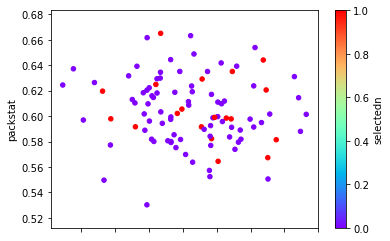

In [64]:
df.plot.scatter(y="packstat",x="cav_vol",c="selectedn",colormap="rainbow")

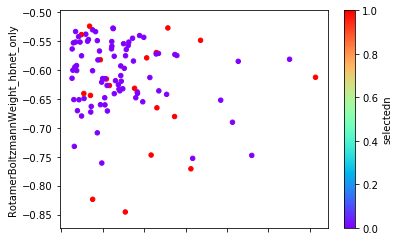

In [65]:
df.plot.scatter(x="dSASA_polar",y="RotamerBoltzmannWeight_hbnet_only",c="selectedn",colormap="rainbow")

In [ ]:
#don't immediately see what my eyes are filtering on. 

In [74]:
len(selected_decoys)

19

In [75]:
#let's look at these 19 in more detail. Gonna order only 4 this time so gotta make these count. 

In [76]:
print("pymol",end=" ")
for path in df[df["selected"]].path:
    print(path,end=" ")

pymol /mnt/home/rdkibler/projects/tiara_gen2/toroids/02_4_churro-9x_xtreme/04_filter_v2/output/2/churro_9x25GB28GB_2_works_dimer_nm_00894_hb_0008_designed_filt.pdb /mnt/home/rdkibler/projects/tiara_gen2/toroids/02_4_churro-9x_xtreme/04_filter_v2/output/3/churro_9x25GB28GB_2_works_dimer_nm_00843_hb_0018_designed_filt.pdb /mnt/home/rdkibler/projects/tiara_gen2/toroids/02_4_churro-9x_xtreme/04_filter_v2/output/1/churro_9x25GB28GB_2_works_dimer_nm_00494_hb_0001_designed_filt.pdb /mnt/home/rdkibler/projects/tiara_gen2/toroids/02_4_churro-9x_xtreme/04_filter_v2/output/4/churro_9x25GB28GB_2_works_dimer_nm_00417_hb_0036_designed_filt.pdb /mnt/home/rdkibler/projects/tiara_gen2/toroids/02_4_churro-9x_xtreme/04_filter_v2/output/0/churro_9x25GB28GB_2_works_dimer_nm_00630_hb_0002_designed_filt.pdb /mnt/home/rdkibler/projects/tiara_gen2/toroids/02_4_churro-9x_xtreme/04_filter_v2/output/5/churro_9x25GB28GB_2_works_dimer_nm_00100_hb_0001_designed_filt.pdb /mnt/home/rdkibler/projects/tiara_gen2/toroids

In [78]:
#selected round 2:
sr2 = [
    "churro_9x25GB28GB_2_works_dimer_nm_00417_hb_0036_designed_filt",
    "churro_9x25GB28GB_2_works_dimer_nm_00690_hb_0023_designed_filt",
    "churro_9x25GB28GB_2_works_dimer_nm_00717_hb_0024_designed_filt",
    "churro_9x25GB28GB_2_works_dimer_nm_00823_hb_0008_designed_filt",
    "churro_9x25GB28GB_2_works_dimer_nm_00316_hb_0001_designed_filt",
    "churro_9x25GB28GB_2_works_dimer_nm_00662_hb_0009_designed_filt",
    "churro_9x25GB28GB_2_works_dimer_nm_00189_hb_0013_designed_filt",
    "churro_9x25GB28GB_2_works_dimer_nm_00403_hb_0001_designed_filt",
    "churro_9x25GB28GB_2_works_dimer_nm_00633_hb_0005_designed_filt",
    "churro_9x25GB28GB_2_works_dimer_nm_00042_hb_0022_designed_filt" 
]

In [79]:
df['selected'] = [True if decoy in sr2 else False for decoy in df.decoy]
df['selectedn'] = [1 if decoy in sr2 else 0 for decoy in df.decoy]

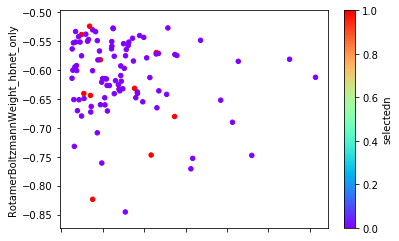

In [80]:
df.plot.scatter(x="dSASA_polar",y="RotamerBoltzmannWeight_hbnet_only",c="selectedn",colormap="rainbow")

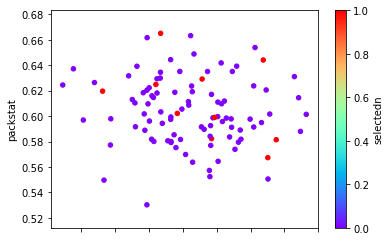

In [83]:
df.plot.scatter(y="packstat",x="cav_vol",c="selectedn",colormap="rainbow")

In [85]:
for path in df[df["selected"]].path:
    print(f"load {path}")

load /mnt/home/rdkibler/projects/tiara_gen2/toroids/02_4_churro-9x_xtreme/04_filter_v2/output/4/churro_9x25GB28GB_2_works_dimer_nm_00417_hb_0036_designed_filt.pdb
load /mnt/home/rdkibler/projects/tiara_gen2/toroids/02_4_churro-9x_xtreme/04_filter_v2/output/2/churro_9x25GB28GB_2_works_dimer_nm_00690_hb_0023_designed_filt.pdb
load /mnt/home/rdkibler/projects/tiara_gen2/toroids/02_4_churro-9x_xtreme/04_filter_v2/output/3/churro_9x25GB28GB_2_works_dimer_nm_00717_hb_0024_designed_filt.pdb
load /mnt/home/rdkibler/projects/tiara_gen2/toroids/02_4_churro-9x_xtreme/04_filter_v2/output/4/churro_9x25GB28GB_2_works_dimer_nm_00823_hb_0008_designed_filt.pdb
load /mnt/home/rdkibler/projects/tiara_gen2/toroids/02_4_churro-9x_xtreme/04_filter_v2/output/4/churro_9x25GB28GB_2_works_dimer_nm_00316_hb_0001_designed_filt.pdb
load /mnt/home/rdkibler/projects/tiara_gen2/toroids/02_4_churro-9x_xtreme/04_filter_v2/output/5/churro_9x25GB28GB_2_works_dimer_nm_00662_hb_0009_designed_filt.pdb
load /mnt/home/rdkible

churro_9x25GB28GB_2_works_dimer_nm_00417_hb_0036_designed_filt<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   This has 2 networks. One wild multi-salt bridge deal, though most of the heavy lifting would be done by a threonine. Bleh. The other one is a ser/thr network. boring. Skip this <br/>
churro_9x25GB28GB_2_works_dimer_nm_00690_hb_0023_designed_filt<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Two netowrks. Nice buried glutamine in one. Another wild buried glutamate, though it's satisfied by many hydrogen bonds and a nearby lys. Helps facilitate a buried bidentate asn/asn interaction. This one is interesting. Very much a contender <br/>
churro_9x25GB28GB_2_works_dimer_nm_00717_hb_0024_designed_filt<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Risky buried asparagine. No nearby lys or arg, but there is a histidine close by that could pull it out of the core. Not buried by Cb I'd say. COuld sneak out. Could make that Asp truly buried by mutating the histidine to V/I/L. again, risky.  <br/>
churro_9x25GB28GB_2_works_dimer_nm_00823_hb_0008_designed_filt<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; similar deal to 717, though maybe a little more plausible. Buried Asp w/o directly coordinating charge partner, though a nearby his may be able to make it electrostatically viable. I'm sketchy on the biochemistry of this, but would the asp in proximity to the his actually lead to protonation and charging of th his?  <br/>
churro_9x25GB28GB_2_works_dimer_nm_00316_hb_0001_designed_filt<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; A better/similar version of 690 for the buried salt bridge. Asp/Glu on different chains though so may be orthogonal b/c of this. Only that one network. Maybe safe?  <br/>
churro_9x25GB28GB_2_works_dimer_nm_00662_hb_0009_designed_filt<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Simple safe buried his network. Definately orderable <br/>
churro_9x25GB28GB_2_works_dimer_nm_00189_hb_0013_designed_filt<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Another pretty simple bidentate Asn/Gln network. Probably good? Has a hole next to the network though so maybe disqualified from that<br/>
churro_9x25GB28GB_2_works_dimer_nm_00403_hb_0001_designed_filt<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ser-asn-ser-gln network. Not very isolated from solvent.  <br/>
churro_9x25GB28GB_2_works_dimer_nm_00633_hb_0005_designed_filt<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Another pretty mundate ser-asn-ser-asn-ser network. Between inner helices. Possibly good  <br/>
churro_9x25GB28GB_2_works_dimer_nm_00042_hb_0022_designed_filt<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; not crazy about this. One network. next to a void. Droppable. <br/>

In [88]:
contenders=[
    "churro_9x25GB28GB_2_works_dimer_nm_00690_hb_0023_designed_filt",
    "churro_9x25GB28GB_2_works_dimer_nm_00316_hb_0001_designed_filt",
    "churro_9x25GB28GB_2_works_dimer_nm_00662_hb_0009_designed_filt",
    "churro_9x25GB28GB_2_works_dimer_nm_00633_hb_0005_designed_filt"
]
df['selected'] = [True if decoy in contenders else False for decoy in df.decoy]
df['selectedn'] = [1 if decoy in contenders else 0 for decoy in df.decoy]

In [89]:
to_order = df[df["selected"]].sort_values(by="decoy")

In [90]:
to_order

,decoy,AveDeg_AB_interface_ILV,AveDeg_A_ILV,AveDeg_B_ILV,AveDeg_ILV,AveDeg_aro_apolar,NetCharge_chainA,NetCharge_chainB,RotamerBoltzmannWeight_hbnet_neighborhood,RotamerBoltzmannWeight_hbnet_only,...,min_before,max_before,avg_before,cst_after,min_after,max_after,avg_after,path,selected,selectedn
5083,churro_9x25GB28GB_2_works_dimer_nm_00316_hb_00...,21.000000,24.666666,27.222221,21.857143,25.351852,-5.0,-6.0,-0.575837,-0.582504,...,0.0,0.007097,0.000789,0.362993,0.0,0.347029,0.040333,/mnt/home/rdkibler/projects/tiara_gen2/toroids...,True,1
6656,churro_9x25GB28GB_2_works_dimer_nm_00633_hb_00...,21.111111,24.722221,27.111111,22.880953,25.286764,-7.0,-8.0,-0.708628,-0.640856,...,0.0,0.014857,0.002110,0.956452,0.0,0.884470,0.119556,/mnt/home/rdkibler/projects/tiara_gen2/toroids...,True,1
9262,churro_9x25GB28GB_2_works_dimer_nm_00662_hb_00...,20.888889,24.666666,27.000000,22.666666,25.338289,-10.0,-8.0,-0.770379,-0.823661,...,0.0,0.009040,0.001205,0.132288,0.0,0.130350,0.011024,/mnt/home/rdkibler/projects/tiara_gen2/toroids...,True,1
11508,churro_9x25GB28GB_2_works_dimer_nm_00690_hb_00...,21.000000,24.666666,27.222221,22.877550,25.250937,-4.0,-11.0,-0.658454,-0.569996,...,0.0,0.048157,0.006794,0.857314,0.0,0.799492,0.057154,/mnt/home/rdkibler/projects/tiara_gen2/toroids...,True,1


In [91]:
print("cp",end=" ")
for path in to_order.path:
    print(path,end=" ")
print("/home/rdkibler/projects/tiara_gen2/toroids/02_4_churro-9x_xtreme/05_order/to_order/full_names")

cp /mnt/home/rdkibler/projects/tiara_gen2/toroids/02_4_churro-9x_xtreme/04_filter_v2/output/4/churro_9x25GB28GB_2_works_dimer_nm_00316_hb_0001_designed_filt.pdb /mnt/home/rdkibler/projects/tiara_gen2/toroids/02_4_churro-9x_xtreme/04_filter_v2/output/6/churro_9x25GB28GB_2_works_dimer_nm_00633_hb_0005_designed_filt.pdb /mnt/home/rdkibler/projects/tiara_gen2/toroids/02_4_churro-9x_xtreme/04_filter_v2/output/5/churro_9x25GB28GB_2_works_dimer_nm_00662_hb_0009_designed_filt.pdb /mnt/home/rdkibler/projects/tiara_gen2/toroids/02_4_churro-9x_xtreme/04_filter_v2/output/2/churro_9x25GB28GB_2_works_dimer_nm_00690_hb_0023_designed_filt.pdb /home/rdkibler/projects/tiara_gen2/toroids/02_4_churro-9x_xtreme/05_order/to_order/full_names


In [92]:
base_name = "actor_9x_"
offset = 16
for i,p in enumerate(to_order.path):
    print(f"cp {p} /home/rdkibler/projects/tiara_gen2/toroids/02_4_churro-9x_xtreme/05_order/to_order/short_names/{base_name}{i+1+offset:03}.pdb")

cp /mnt/home/rdkibler/projects/tiara_gen2/toroids/02_4_churro-9x_xtreme/04_filter_v2/output/4/churro_9x25GB28GB_2_works_dimer_nm_00316_hb_0001_designed_filt.pdb /home/rdkibler/projects/tiara_gen2/toroids/02_4_churro-9x_xtreme/05_order/to_order/short_names/actor_9x_017.pdb
cp /mnt/home/rdkibler/projects/tiara_gen2/toroids/02_4_churro-9x_xtreme/04_filter_v2/output/6/churro_9x25GB28GB_2_works_dimer_nm_00633_hb_0005_designed_filt.pdb /home/rdkibler/projects/tiara_gen2/toroids/02_4_churro-9x_xtreme/05_order/to_order/short_names/actor_9x_018.pdb
cp /mnt/home/rdkibler/projects/tiara_gen2/toroids/02_4_churro-9x_xtreme/04_filter_v2/output/5/churro_9x25GB28GB_2_works_dimer_nm_00662_hb_0009_designed_filt.pdb /home/rdkibler/projects/tiara_gen2/toroids/02_4_churro-9x_xtreme/05_order/to_order/short_names/actor_9x_019.pdb
cp /mnt/home/rdkibler/projects/tiara_gen2/toroids/02_4_churro-9x_xtreme/04_filter_v2/output/2/churro_9x25GB28GB_2_works_dimer_nm_00690_hb_0023_designed_filt.pdb /home/rdkibler/proje

In [93]:
base_name = "actor_9x_"
offset = 16
for i,d in enumerate(to_order.decoy):
    print(f"{d} {base_name}{i+1+offset:03}")

churro_9x25GB28GB_2_works_dimer_nm_00316_hb_0001_designed_filt actor_9x_017
churro_9x25GB28GB_2_works_dimer_nm_00633_hb_0005_designed_filt actor_9x_018
churro_9x25GB28GB_2_works_dimer_nm_00662_hb_0009_designed_filt actor_9x_019
churro_9x25GB28GB_2_works_dimer_nm_00690_hb_0023_designed_filt actor_9x_020
